p  
q  
$p(t) \sim b0 * q(t) + b1 * q(t-1)$

In [106]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [107]:
aapl = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSl-t5KV0KBJcbp17JPuF-CP2smCnbInVZJ25oKo__gikuSEKtUT_IjdVQnq-uocf-fYoQjJ3khIZft/pub?gid=1220096092&single=true&output=csv", 
                   index_col="Date", parse_dates=True)
aapl.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-06-27,23.250000,24.117500,22.875000,23.972500,22.394749,737313600
2016-07-04,23.847500,24.222500,23.592501,24.170000,22.579247,450824000
2016-07-11,24.187500,24.825001,24.182501,24.695000,23.069700,571642400
2016-07-18,24.674999,25.250000,24.577499,24.665001,23.041672,590262000
2016-07-25,24.562500,26.137501,24.105000,26.052500,24.337851,1026284000


In [108]:
aapl = sm.add_constant(aapl, prepend=True)
aapl.head()

,const,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-06-27,1.0,23.250000,24.117500,22.875000,23.972500,22.394749,737313600
2016-07-04,1.0,23.847500,24.222500,23.592501,24.170000,22.579247,450824000
2016-07-11,1.0,24.187500,24.825001,24.182501,24.695000,23.069700,571642400
2016-07-18,1.0,24.674999,25.250000,24.577499,24.665001,23.041672,590262000
2016-07-25,1.0,24.562500,26.137501,24.105000,26.052500,24.337851,1026284000


In [109]:
aapl["Volume (t-1)"] = aapl["Volume"].shift(1)
aapl.head()

,const,Open,High,Low,Close,Adj Close,Volume,Volume (t-1)
Date,,,,,,,,
2016-06-27,1.0,23.250000,24.117500,22.875000,23.972500,22.394749,737313600,NaN
2016-07-04,1.0,23.847500,24.222500,23.592501,24.170000,22.579247,450824000,737313600.0
2016-07-11,1.0,24.187500,24.825001,24.182501,24.695000,23.069700,571642400,450824000.0
2016-07-18,1.0,24.674999,25.250000,24.577499,24.665001,23.041672,590262000,571642400.0
2016-07-25,1.0,24.562500,26.137501,24.105000,26.052500,24.337851,1026284000,590262000.0


In [110]:
aapl[["Volume", "Volume (t-1)", "Adj Close"]]

,Volume,Volume (t-1),Adj Close
Date,,,
2016-06-27,737313600,NaN,22.394749
2016-07-04,450824000,737313600.0,22.579247
2016-07-11,571642400,450824000.0,23.069700
2016-07-18,590262000,571642400.0,23.041672
2016-07-25,1026284000,590262000.0,24.337851
...,...,...,...
2021-05-31,278314500,357615000.0,125.889999
2021-06-07,327048100,278314500.0,127.349998
2021-06-14,456976800,327048100.0,130.460007


In [111]:
mod = sm.OLS(aapl["Adj Close"], aapl[["Volume", "Volume (t-1)"]], missing="drop")
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:              Adj Close   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              272.6
Date:                Sat, 29 Apr 2023   Prob (F-statistic):                    1.90e-64
Time:                        21:28:03   Log-Likelihood:                         -1329.9
No. Observations:                 261   AIC:                                      2664.
Df Residuals:                     259   BIC:                                      2671.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

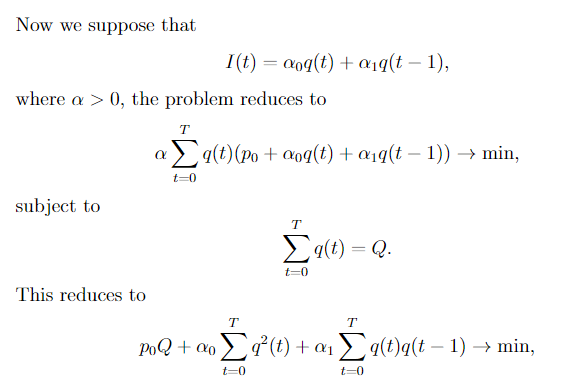

In [112]:
T = 50
Q = 1000
n = 1000
a0 = res.params[0]
a1 = res.params[1]

In [113]:
def v(q, a0, a1):
    return a0 * (q ** 2).sum() + a1 * (q[1:] * q[:-1]).sum()

evaluate a0, a1 and define a function V by the formula above

We have 3 variables - y and 2 x's: p(t), q(t), q(t-1). Make 3 scatters between them. 

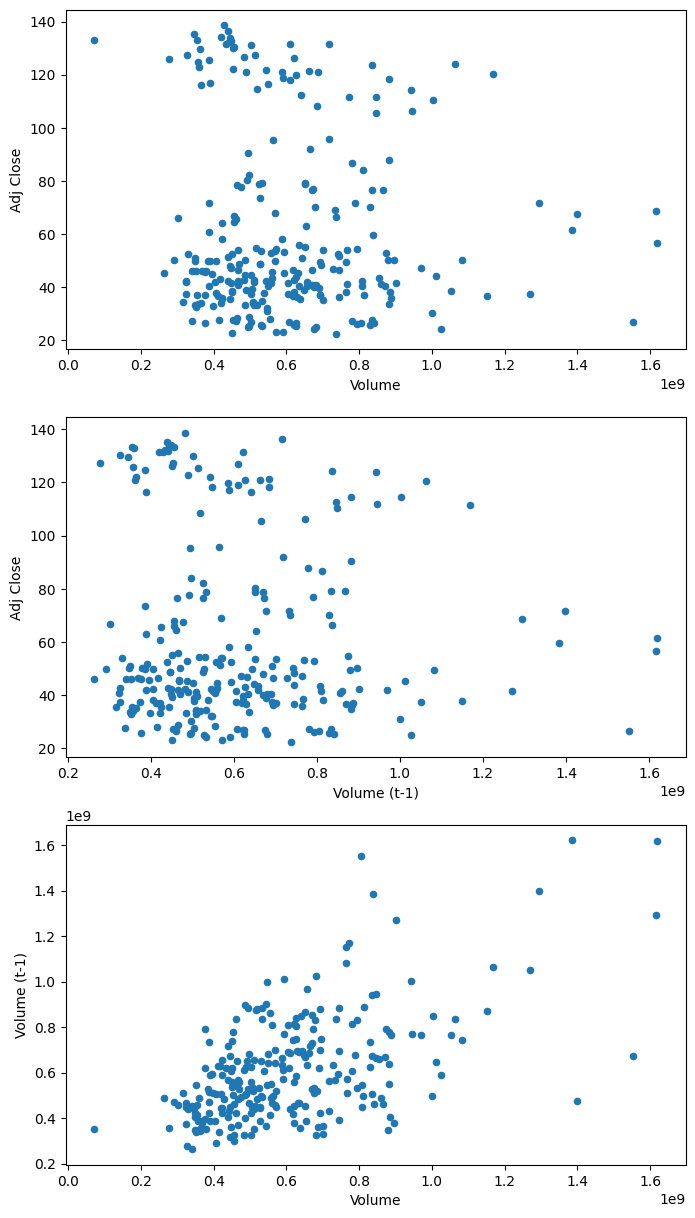

In [114]:
fig, axes = plt.subplots(nrows = 3, figsize=(8, 15))

aapl.plot.scatter(x="Volume", y="Adj Close", ax=axes[0])
aapl.plot.scatter(x="Volume (t-1)", y="Adj Close", ax=axes[1])
aapl.plot.scatter(x="Volume", y="Volume (t-1)", ax=axes[2])
plt.show()

2 time series plots - p(t) and q(t)

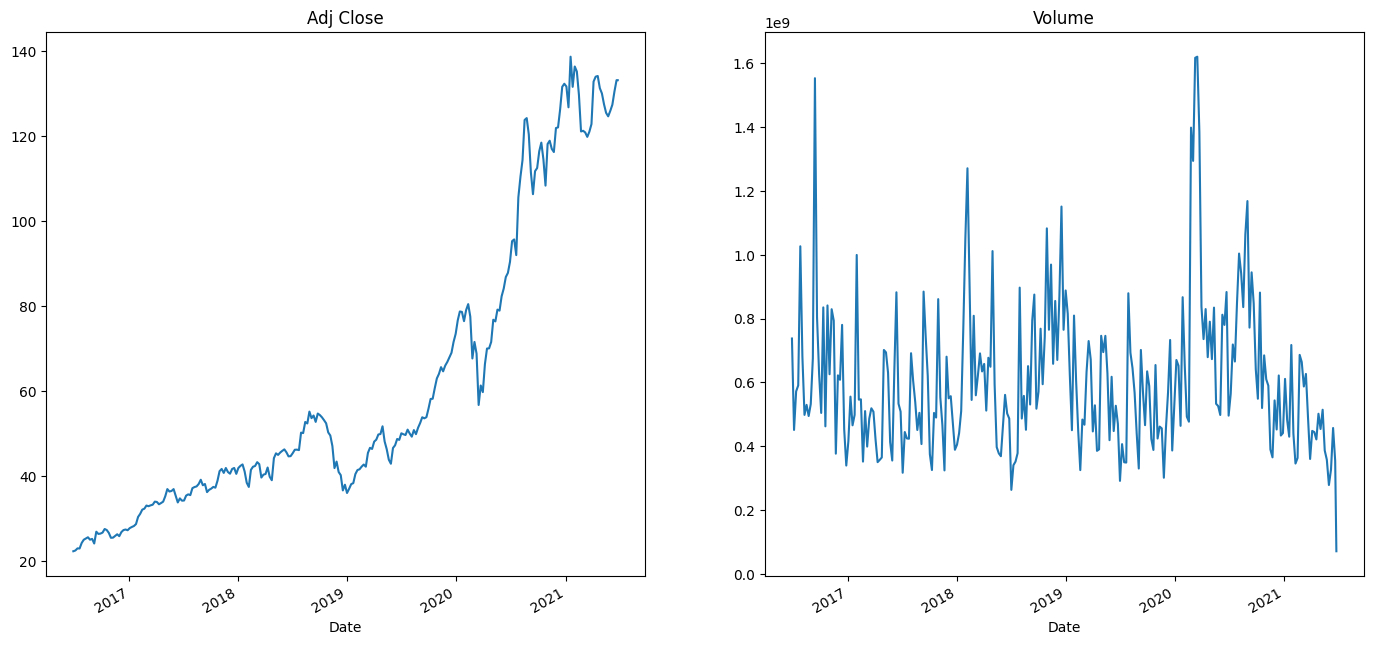

In [115]:
fig, axes = plt.subplots(ncols = 2, figsize=(17, 8))

aapl["Adj Close"].plot(title="Adj Close", ax=axes[0])
aapl["Volume"].plot(title="Volume", ax=axes[1])
plt.show()

In [116]:
q = np.random.normal(size=(n, T + 1))
q

array([[-0.3929072 , -0.82430229,  0.37238565, ...,  0.349052  ,
         0.24359262, -1.45050415],
       [-0.43145094,  1.18777349,  0.31759719, ...,  0.74675509,
         0.80182405,  0.84240045],
       [ 1.75311792,  0.48026014,  0.81095546, ..., -0.45807826,
         0.52549257, -0.60830275],
       ...,
       [-1.28648727,  0.81068432,  1.46263796, ..., -0.17081489,
        -0.13951748, -0.96703836],
       [ 0.05584279, -1.3211527 ,  1.77996025, ...,  1.3175371 ,
        -1.35343541, -1.13562424],
       [-0.31896695,  1.05555603,  1.1109307 , ...,  1.08184781,
         1.62019086, -0.55749838]])

In each line, take the sum of the elements. Divide that line by the sum. Now the line sums to 1. Multiply that line by Q. Now that line sums to Q. 

In [117]:
q_double_array = (q / q.sum(axis=1, keepdims=True)) * Q
q_double_array

array([[-174.24611979, -365.56081615,  165.14524332, ...,  154.79725853,
         108.0282284 , -643.268242  ],
       [  74.5151233 , -205.13824392,  -54.85164517, ..., -128.97074227,
        -138.48160328, -145.48948153],
       [2018.68929652,  553.01243563,  933.8031964 , ..., -527.47033006,
         605.0969019 , -700.45159751],
       ...,
       [ 185.35997062, -116.80521448, -210.74015725, ...,   24.61139258,
          20.10199145,  139.33305557],
       [  38.74575694, -916.6637663 , 1235.00112011, ...,  914.15512972,
        -939.06267767, -787.93737658],
       [  85.04218776, -281.42976917, -296.19362851, ..., -288.43962042,
        -431.97132744,  148.63885463]])

In [118]:
# Check
q_double_array.sum(axis=1)

array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
       1000., 1000.,

Compute V of each line of this double array and store it. 

In [119]:
v_array = np.apply_along_axis(v, 1, q_double_array, a0=a0, a1=a1)
v_array

array([5.70950934e-01, 8.14203623e-02, 2.01807402e+00, 1.22723609e+00,
       4.34176480e-02, 2.67116570e-01, 3.08539643e-02, 3.63593369e+00,
       1.30865195e-02, 2.74307068e-02, 3.74162229e-02, 3.36571299e-02,
       3.07658101e+00, 6.11451675e-02, 1.37793000e-01, 3.73482123e-02,
       2.31330396e-01, 3.88395585e+00, 1.19527597e-01, 1.39205702e+00,
       7.29784808e-01, 1.08684235e-02, 2.33965059e-02, 2.58316131e-01,
       4.73589668e-02, 2.39997179e-01, 6.92861080e-02, 1.69013274e-02,
       7.42120052e-01, 1.19019114e-01, 3.80293703e-02, 2.17651988e-02,
       2.03741945e-01, 3.97881690e-02, 1.19156219e-01, 2.10195918e-01,
       8.78312544e-02, 5.35591701e-02, 2.22786504e-01, 2.24411902e-02,
       6.99647604e-01, 5.37329536e-02, 1.28871890e-01, 3.20349974e+02,
       8.22734045e-01, 2.11526065e-02, 3.02482041e-01, 5.72510444e-01,
       7.56756766e-01, 2.71036238e-02, 4.81791012e-02, 7.92295996e+00,
       4.35633295e-01, 5.42026721e-02, 1.02349978e-01, 5.55682934e-02,
      

Find minimal element here, and its index. 


In [120]:
argmin_index = np.argmin(v_array)
argmin_index

425

In [121]:
v_argmax = np.argmax(v_array)
print("v_argmax =", v_argmax)
v_max = np.max(v_array)
print("v_max =", v_max)

v_argmax = 131
v_max = 2045057.7099290432


In [122]:
v_sorted = np.sort(v_array)
v_sorted

array([5.38584931e-03, 5.54027895e-03, 5.91324627e-03, 6.24200690e-03,
       6.52974759e-03, 6.58934587e-03, 6.67213629e-03, 6.81533901e-03,
       6.93383117e-03, 7.06023601e-03, 7.45779737e-03, 7.54762086e-03,
       7.55423498e-03, 7.59963128e-03, 7.75852277e-03, 7.79384756e-03,
       8.16922484e-03, 8.26035486e-03, 8.27245240e-03, 8.29228868e-03,
       8.52949596e-03, 8.57370811e-03, 8.72641288e-03, 9.11201413e-03,
       9.34199304e-03, 9.38550818e-03, 9.48935267e-03, 9.52756258e-03,
       9.74997181e-03, 1.00721267e-02, 1.00886056e-02, 1.00971574e-02,
       1.01560797e-02, 1.02148133e-02, 1.03710401e-02, 1.04519234e-02,
       1.06009074e-02, 1.06289265e-02, 1.08449712e-02, 1.08684235e-02,
       1.11681323e-02, 1.11936962e-02, 1.12707652e-02, 1.13816301e-02,
       1.14302825e-02, 1.14830693e-02, 1.15364195e-02, 1.15754872e-02,
       1.17280883e-02, 1.19119880e-02, 1.19359786e-02, 1.19682186e-02,
       1.20146214e-02, 1.23673045e-02, 1.24870541e-02, 1.24952023e-02,
      

Take the corresponding q array. Or use the same index. 

In [123]:
optimal_schedule = q_double_array[argmin_index, :]
optimal_schedule, optimal_schedule.sum()

(array([ 59.03817432,  56.4939987 ,  15.48541796, 100.05278602,
        -16.41079749,  16.44739321, -68.8733582 ,  40.46966256,
        -39.03291594, 140.84826207,   2.64255424,  31.22966376,
          6.717716  ,   2.44211532,  46.63429515,  52.84861368,
         27.78950796,  68.33878062,  18.1311791 ,  39.0922623 ,
         14.9663483 ,   2.46246122, -74.65254157,  45.14326497,
         23.72747747, -20.66836566,  58.30356122, -44.41358885,
         35.50096297, -68.52241493,  26.85047962,  22.36460403,
         24.3044417 ,  -9.06027593,  62.85002792,  53.5125163 ,
         14.41312371, -14.5801168 ,  75.40199014,  -2.94919401,
         -9.9403392 , -22.75721107, -34.09749698,  -1.74398169,
        -75.86245698,  27.2023277 ,  30.82149965,  81.94832144,
         17.35885842,  19.69468999, 142.03571554]),
 1000.0)

Visualize this schedule of purchases. 

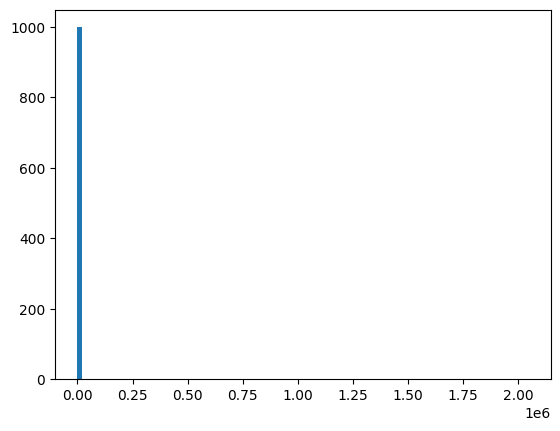

In [124]:
plt.hist(v_array, bins = 100)
plt.show()

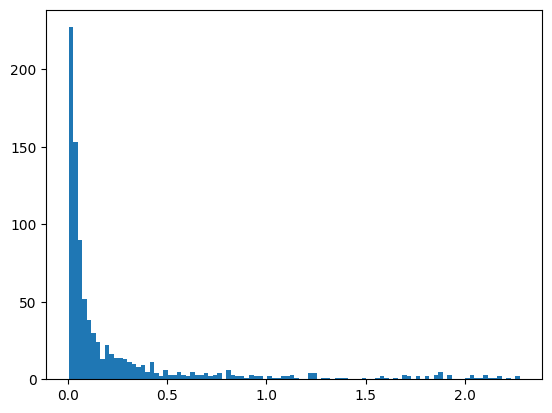

In [125]:
v_right_truncated = v_sorted[: -100]
plt.hist(v_right_truncated, bins = 100)
plt.show()

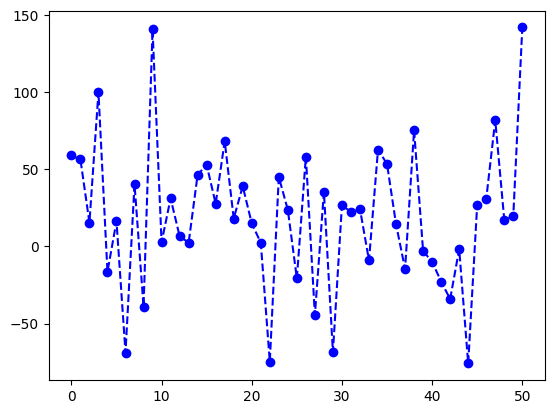

In [126]:
plt.plot(optimal_schedule, "--bo")
plt.show()